# 신경세포

신경망은 뉴런 모델을 단위로 구축된다. 뉴런 모델은 뇌의 신경세포에서 힌트를 얻어 만들어진 수학모델이다. 
<br>뇌의 신경세포에서 힌트를 얻어 만즐어진 수학 모델이다.   
전기적 펄스를 다른 신경세포에 전달한다.   
신경세포는 다른 세포에 전기적 펄스를 받으면 세포의 전기적인 레벨이 오르락   내리락한다. 시냅스에는 몇가지 종류가 있으며 이를 통해 시냅스의 전달 강도에  
따라 전위가 올라갈지 내려갈지 결정된다. 


### 뉴런 모델

신경세포의 움직임을 단순화한 수학적 모델인 뉴럴 모델을 설명, 뉴런은  
입력이 들어오면 입력이 들어온 만큼 가중치를 곱한다음, bias를 더한다.    
그 다음 시드모이드 함수를 통과시켜서 출력값 y가 나온다.   
y는 0부터 1까지 연속된 값을 갖는다.   


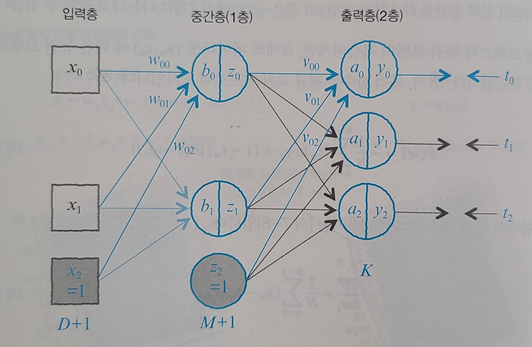

- 2차원 입력을 받아서 2개의 층을 지나 최종값을 출력을 한다고 가정.   
- 화살표가 노드이고, 원안에 있는 값은 중간 산출물이다.

입력 X = $[x_0, x_1]$ 가중치 W = $[w_0, w_1]$ w_2는 bias 항이다.


$$  a = w_0x_0+w_1x_1+w_2  $$

편향(bias)은 하나의 뉴런으로 입력된 모든 값을 다 더한 다음, 더해주는 상수이다. 
- 입력 데이터와 아무런 상호작용 없지만, 출력 값에 영향을 끼친다. 
- 하나의 뉴런에서 활성화 함수를 거쳐 최종적으로 출력되는 값을 조절한다.   
- 
다양하고 큰 데이터셋에 대해 일반화를 잘하기 위해 모델(가설)의 일부 특징에  
더 큰 중요도를 더 부과한다고 생각하면 된다. 

- 데이터의 분포에따라 평면을 그어야 하는데 bias항이 없으면 원점을 벗어나지 못한다.

$$y = \frac{1}{1+exp(-a)} $$  시그모이드

시그모이드는 어디서 나왔을까? 시그모이드는 이진 분류에서 나왔다.   
$\frac{성공확률}{실패확률}$에서 로그를 취한 로짓함수에서 유래되었다.   
$log(\frac{P}{1-P}) = f(x)$에서 f(x)가 나오게하는 확률 P를 구하고 싶기 때문에  
이 함수에서 f(x)대신, P에 대한 방정식으로 표현하면, 시그모이드 식이 나온다. 

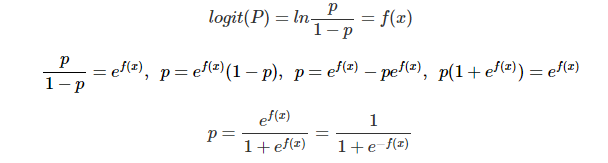

로지스틱 시그모이드: 주어진 데이터를 넣었을 때, 입력에 따라 정확한 확률을 출력할 수 있는 f(x)를 구하기 

i번째 입력부터 j번째 뉴런에 대한 가중치를 $w_{ij}$ 라고 표현, j번째 뉴런의 총합을 $b_j$라고 표현

<br>$ b_j= \sum_{i= 0}^{2} {w_{ji} x_i }   $

i개의 입력과 j개의 가중치가 만나 출력을 형성, 이때, $x_2$는 bias항이다.
<br>$z_j = h(b_j)$ 입력과 가중치 곱의 총합을 비선형 함수에 넣어 중간 산출물을 만들었다.

$$ a_k = \sum_{j =0}^{2} v_{kj}z_j $$

- 두번째 층에서 j개를 가진 v라는 가중치와 첫번째 층의 출력값 z(중간 산출물)가 만나서 행렬곱을 한다.

- $$  a_0 = v_{00}z_0+v_{01}z_1+v_{02}z_2  $$  중간 산출물 z_0, z_1이 2차원입력으로들어가며, z_2는 bias항이라서 1이다. 

- a_0은 2개의 중간 산출물이 0번째 카테고리에 대해 어떤 값이 나오는 지 선형 연산을 한 모습이다.    

- 만약 값이 크다면? 중간 산출물 z_0과 z_1은 0번째 카테고리 식으로 회귀하는 경향이 있는 것을 알 수 있다.   
(z_0, z_1은 0번째 식으로 설명이 가능하다.) 

$$ y_k = \frac {exp(a_k)}{\sum_{l=0}^{2} exp(a_l)} $$

마지막에는 exp를 취해서 모두 더한 다음, 해당하는 카테고리 출력 값(v와 z가 선형 연산을 한 값)에서 exp를 취한 값을 나눈다.   
카테고리에 해당하는 확률값이 나온다.   

+)여기서 왜 비선형 함수가 필요할까?  
- 선형적인 연산을 한다면 아무리 여러 겹으로 해도   
선형적인 변환 한것과 같아서 깊은 층의 의미가 사라진다.   

- 

In [1]:
import numpy as np
np.random.seed(seed = 1)
N = 200
K = 3
T = np.zeros((N, 3), dtype = np.uint8)
X = np.zeros((N, 2)) #2차원데이터
X_range0 = [-3, 3]
X_range1 = [-3, 3]
Mu = np.array([[-.5, -.5 ], [.5, 1.0], [1, -.5]])
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) 
Pi = np.array([0.4, 0.8, 1])
for n in range(N):    #200개의 데이터를 랜덤으로 뽑는다.
  wk = np.random.rand()
  for k in range(K):
    if wk < Pi[k]:
      T[n, k] = 1
      break
  for k in range(2):
    X[n, k] = np.random.randn() * Sig[T[n, : ] == 1, k] + Mu[T[n, :] == 1, k]

#np.random.rand()는 균일하게 난수 생성
#np.random.randn()은 가우시안 분포를 따르면서 생성


In [2]:
test_ratio = 0.5
X_n_training = int(N * test_ratio)
X_train = X[:X_n_training, :] #행은 데이터의 개수 열은 데이터의 차원 데이터의 차원은 유지, 데이터의 행만 슬라이싱을 한다.
X_test = X[X_n_training:, :]
T_train = T[:X_n_training, :]
T_test= T[X_n_training:, :]

np.savez('class_data.npz', X_train = X_train, X_test = X_test, T_train = T_train, T_test = T_test, X_range0 = X_range0, X_range1 = X_range1)

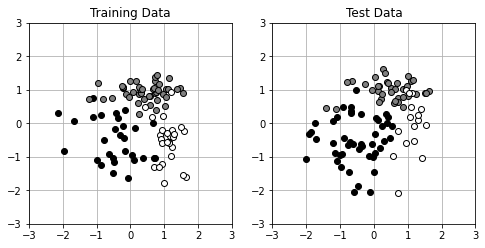

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_data(x, t):
  wk ,n = t.shape
  c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
  for i in range (n):
    plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle = 'None', marker = 'o',
             markeredgecolor = 'black', color = c[i])  #1이 있는 위치의 x0데이터를 x축, 1이 있는 위치의 x1데이터를 y축으로 한다.
  plt.grid(True)


plt.figure(1, figsize= (8, 3.7))
plt.subplot(1, 2, 1)
show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1, 2, 2)
show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

네트워크 함수는 N개의 데이터를 한번에 처리한다.   
- X의 데이터 수는 N \* D차원의 행렬로 정의한다. N은 데이터의 개수, K는 데이터의 차원의 개수이다. 
- y는 N \*K차원의 행렬로 한다. 이때 N은 데이터의 개수 K는 카테고리의 개수이다. 
- y의 요소 y[n, 0] y[n, 1], y[n, 2]는 입력데이터 X가 클래스 0, 1, 2에 속할 가능성을 나타낸다.   


중간층 가중치 W와 출력층 가중치 V가 존재
- W는 M \*(D+1)의 행렬이다. bias항까지 포함하여 D+1이다. M은 중간 출력물의 크기이다.
- V는 K \*(M+1)의 행렬이다. bias항까지 포함하여 M+1이다. 
- M=2, K=3인 경우 wv의 길이는 M \*(D+1)+K \*(M+1)하여 14나온다. 


데이터의 행: 데이터의 개수, 데이터의 열: 데이터의 차원   
가중치의 행: 출력할 카테고리의 개수, 가중치의 열: 가중치가 받는 입력의 차원

In [7]:
def sigmoid(x):
  y = 1 / (1 + np.exp(-x))
  return y

def FNN(wv, M, K, x):
  N, D = x.shape
  w = wv[:M * (D + 1)]
  w = w.reshape(M, (D+1)) #D+1만큼 받아서 M개만큼 출력
  v = wv[M * (D + 1):]
  v = v.reshape(K, M+1) #M+1만큼 받아서 K개의 출력
  b = np.zeros((N, M+1))
  z = np.zeros((N, M+1)) #b에서 sigmoid 통과한 것이 z(중간층 뉴런의 출력)
  a = np.zeros((N, K))#출력층 뉴런의 입력 총합
  y= np.zeros((N,K)) #최종 출력
  for n in range(N):
      # 중간층의 계산
    for m in range(M):
      b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1]) # (A)
      z[n, m] = sigmoid(b[n, m])
      # 출력층의 계산
      z[n, M] = 1 # 더미 뉴런
      wkz = 0
      for k in range(K):
        a[n, k] = np.dot(v[k, :], z[n, :])
        wkz = wkz + np.exp(a[n, k])
      for k in range(K):
        y[n, k] = np.exp(a[n, k]) / wkz
  return y, a, z, b


# test ---
WV = np.ones(15)
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :])



(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

# 수치 미분법

3분류 문제이기 때문에 평균 교차 엔트로피를 사용한다.

$$ E(w, v)= -\frac{1}{N}\sum^{N-1}_{n = 0}\sum^{K-1}_{n = 0} t_{nk}log(y_{nk})   $$

수치적인 미분법: 아주작은 근사값을 이용하여 극한을 구하는 방법이다.   

$$ \frac{E(w+e)-E(w-e)}{2e} \ 이때, \ e는 \ 매우 \ 작은 \ 수$$

+) 대입을 하여 하나하나 구하는 방법 두점사이의 기울기를 이용함  
해석은 공식으로 미분한다.  

- 시간이 너무나 오래 걸린다.
 

In [10]:
def CE_FNN(wv, M, k, x, t):
  N, D = x.shape
  y, a, z, b = FNN(wv, M, k, x)
  ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N #log(y)와 t끼리 내적을 한 다음, N으로 나누고 -붙이기!
  return ce

WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


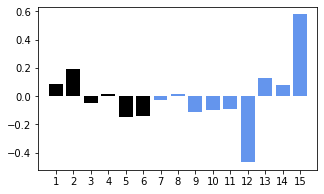

In [11]:
def dCE_FNN_num(wv, M, K, x, t):
    epsilon = 0.001
    dwv = np.zeros_like(wv)
    for iwv in range(len(wv)):
        wv_modified = wv.copy()
        wv_modified[iwv] = wv[iwv] - epsilon    #E(w-e)를 표현
        ce1 = CE_FNN(wv_modified, M, K, x, t)
        wv_modified[iwv] = wv[iwv] + epsilon    #E(w+e)를 표현 
        ce2 = CE_FNN(wv_modified, M, K, x, t)
        dwv[iwv] = (ce2 - ce1) / (2 * epsilon)
    return dwv


#--dVW의 표시 ------------------
def Show_WV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3], align="center", color='black') 
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:],
            align="center", color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)


#-test----
M = 2
K = 3
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[:2, :], T_train[:2, :])
print(dWV)
plt.figure(1, figsize=(5, 3))
Show_WV(dWV, M)
plt.show()

In [ ]:
# 리스트 7-1-(7)
import time


# 수치 미분을 사용한 구배법 -------
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wvt = wv_init
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n): # (A)
        wvt = wvt - alpha * dCE_FNN_num(wvt, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)
        wv_hist[i, :] = wvt #미분값을 하나씩 저장 
    return wvt, wv_hist, err_train, err_test


# 메인 ---------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000 # (B) 학습 단계, 1000번 동안 진행.
alpha = 0.5
WV, WV_hist, Err_train, Err_test = Fit_FNN_num(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:296.754 sec


In [ ]:
print(WV_hist)

[[ 1.49525039e-02 -6.98839553e-03 -5.44683038e-03 ... -4.00597330e-02
  -4.21394488e-02 -6.44452584e-02]
 [ 1.41129875e-02 -4.05678601e-04 -4.34026365e-03 ... -5.80471654e-02
  -6.18703708e-02 -1.02489715e-01]
 [ 1.31405945e-02  9.64139962e-03 -3.54462489e-03 ... -6.69421474e-02
  -7.26628866e-02 -1.21669562e-01]
 ...
 [ 4.05054851e+00  5.23649701e-01 -2.22136290e+00 ...  4.78521704e+00
  -2.71748629e+00 -9.14549097e-01]
 [ 4.04969354e+00  5.23093399e-01 -2.22140608e+00 ...  4.78671328e+00
  -2.71698151e+00 -9.15108712e-01]
 [ 4.04883816e+00  5.22538006e-01 -2.22144800e+00 ...  4.78820706e+00
  -2.71647693e+00 -9.15667132e-01]]


In [ ]:
print(WV_hist.shape)

(1000, 15)


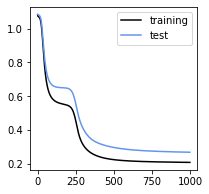

In [ ]:
#목적함수의 동향
plt.figure(1, figsize=(3, 3))
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label ='test')
plt.legend()
plt.show()

중간에 속도가 느려지는 이유: 안장점에 중간에 존재하기 때문이다. 

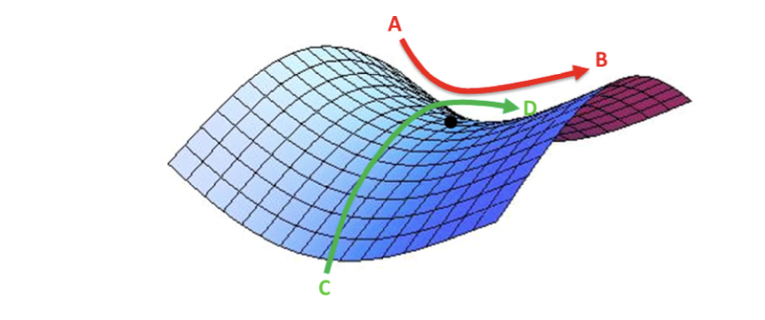
경사법은 기울기가 0인 장소를 찾지만 그것이 반드시 최소값이라고는 할 수 없다.(극소값이나 안장점일 가능성이 있다.)     

- 함수가 극소값, 최소값 또는 안장점(saddle point)이 되는 장소에서는 기울기가 0이다.   
- 극소(local minima)값은 국소적인 최소값, 즉 한정된 범위에서의 최솟값인 점이다.   
- 안장점은 어느 방향에서 보면 극대값이고 다른 방향에서 보면 극소값이 되는 점이다.   
- 함수의 차원이 높을수록 (모델에 파라미터가 많을수록) 지역 최솟값보다 안장점이 기하급수적으로 많을 가능성이 크다.


출처: https://aroundck.tistory.com/5324 [돼지왕 놀이터]   
      https://iagreebut.tistory.com/17

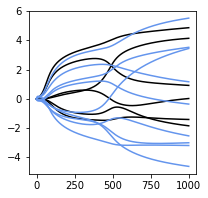

In [ ]:
#가중치의 변화
plt.figure(1, figsize=(3, 3))
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
plt.show()

가중치들이 미분값에 따라 어떻게 움직이는지 볼 수 있다. 

(3600, 2)


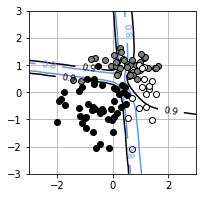

In [25]:
def show_FNN(wv, M, K):
    xn = 60 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn) #-3부터 3까지 60개의 수 
    x1 = np.linspace(X_range1[0], X_range1[1], xn) #-3부터 3까지 60개의 수 
    xx0, xx1 = np.meshgrid(x0, x1) #xx0은 열별로 xx1은 행별로 같다. 

    x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))] #60 * 60으로 되있는 xx0, xx1을 3600,1로 바꾸어서 서로 붙인다. 

    print(x.shape)
    y, a, z, b = FNN(wv, M, K, x)
    plt.figure(1, figsize=(4, 4))
    for ic in range(K):
        f = y[:, ic]
        f = f.reshape(xn, xn)
        f = f.T
        cont = plt.contour(xx0, xx1, f, levels=[0.8, 0.9],
                           colors=['cornflowerblue', 'black'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    
    
# 경계선 표시 --------------------------
plt.figure(1, figsize=(3, 3))
show_data(X_test, T_test)
show_FNN(WV, M, K)
plt.show()

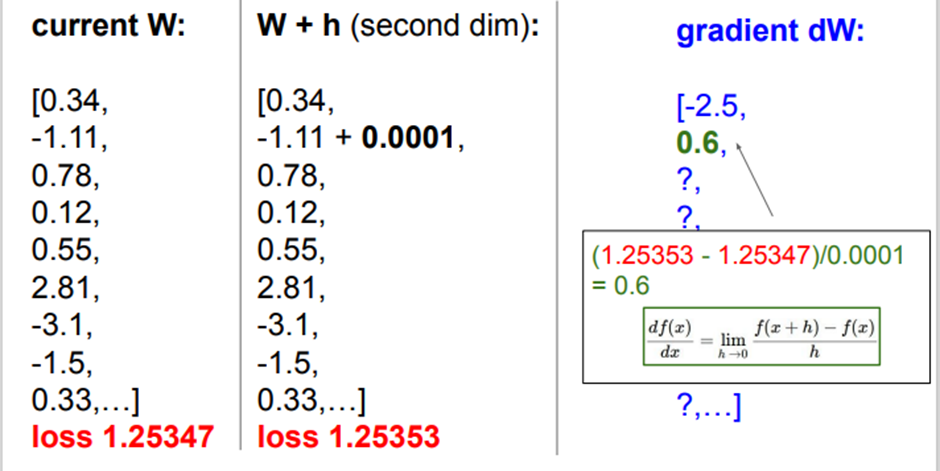

# 오차역전파를 이용한 해석적 미분법

오차를 이용하여 출력층의 가중치부터 중간층의 가중치까지 입력 방향의 반대로 가중치를 갱신해 나가기.  


1. 오차함수를 정의하기 

$$1개의 \ 샘플에 \ 해당하는 \ 오차 E_n(w, v)= -\sum^{k-1}_{k =0}t_kln(y_k) $$
$$모든  \ 샘플을 \ 더하고 \ 나눈 \ 모습 E(w, v) =\frac{1}{N} \sum^{N-1}_{n = 0}E_n(w, v)     $$

2. $$ \frac{dE_n}{dv_{kj}} 구하기$$ 

$$ \frac{dE_n}{dv_{kj}} = \frac{dE_n}{da_k} \cdot \frac{da_k}{dv_{kj}} $$ 

여기서 k는 모델이 분류해야하는 카테고리의 개수, n은 n번째의 데이터를 그리고 j는 중간 산출물의 개수를 뜻한다. 

k=0인 경우를 보면

$$ \frac{dE}{da_0}= \frac{d}{da_0}(-t_0 log(y_0)-t_1log(y_1)- t_2log(y_2)) $$

t가 정답이기 때문에 a의 영향을 받지 않지만, y0, y1, y2의 경우,  
a의 값에 영향을 크게받기 때문에 역전파 계산을 할때 같이 미분을 해야한다.    
a0이 커지면 y0이 커지고 a0이 작으면 y0이 작아지기 때문이다.

$$ \frac{dE}{da_0}= -t_0\frac{1}{y_0}\frac{dy_0}{da_0}-t_1\frac{1}{y_0}\frac{dy_1}{da_0}-t_2\frac{1}{y_0}\frac{dy_2}{da_0} $$

$$ \frac{y_j}{x_i} = y_j(I_{ij}-y_i)  $$를 이용    
$I_{ij}$은 i = j이면 1이 되고, i !=j 이면 0인 함수이다. 

$$ \frac{dy_0}{dx_0}= y_0(1-y_0)      $$

<br>$$ \frac{dy_1}{dx_0}=-y_1y_0, \frac{dy_0}{dx_1}= -y_0y_1 $$

$$ \frac{dE}{da_0} = -t_0(1-y_0)+y_1y_0+t_2y_0 = (t_0+t_1+t_2)y_0-t_0 $$


<br>$$ (t_0+t_1+t_2)=1이기 \ 때문에 \ y_0-t_0이 \ 된다. $$

일반화를 한다면, 


$$ \frac{dE}{da_k}= y_k-t_k가 \ 된다. \ (카테고리에 \ 해당하는 \ 출력값-카테고리에 \ 해당하는 \ target값 )   $$




3. $$\frac{da_k}{dv_{kj}}구하기$$

$$ a_k = v_{k0}z_0+v_{k1}z_1+v_{k2}z_2    $$


여기서 z2는 bias항이라서 1이며, $z_0$, $z_1$은 중간 산출물(입력과 1층 퍼셉트론이 만나 행렬곱을 한 다음,
비선형 함수를 통과한 모습)이고  
$v_{k0}$과 $v_{k1}$은 2번째층의 매개변수이다. 

$$ \frac{da_k}{dv_{k0}}=z_0, \ \frac{da_k}{dv_{k1}}=z_1, \ ,\frac{da_k}{dv_{k0}}=z_2     $$
가 되는 것을 볼 수 있다. 

$$ \frac{dE_n}{dv_{kj}} = \frac{dE_n}{da_k} \cdot \frac{da_k}{dv_{kj}} = (y_k-t_k)\cdot (z_j) $$ k는 카테고리, j는 차원이다. 

결론 
$$ v_{kj}(t+1)= v_{kj}(t)-(learning \ rate) \cdot \frac{dE}{dv_{kj}}=v_{kj}(t)-α(y_k-t_k)\cdot (z_j)    $$

4. 이번에는 

$$\frac{dE}{dw_{ji}}구하기$$

$$ \frac{dE}{dw_{ji}} = \frac{dE}{db_j}\cdot \frac{db_j}{dw_{ji}}   $$

$$ \frac{db_j}{dw_{ji}}= \frac{d}{dw_{ji}} \sum^D_{i = 0} w_{ji}x_i = x_i    $$

$$ w_{ji}(t+1)= w_{ji}(t)-\alpha \frac{dE}{dw_{ji}}      $$

$\frac{dE}{dw_{ji}}$를 구하기 위해서는 목적함수에서 2층 출력물로 가는  
오차역전파, 그리고 2층 출력물에서 목적함수를 취한 1층 출력물까지의 오차  
 역전파를 구하여 모두 곱해야한다.  

$$\frac{dE}{db_j} = \sum_{k = 0}^{K - 1} \frac{dE}{da_k} \cdot \frac{da_k}{dz_j} \cdot \frac{dz_j}{db_j}$$

목적함수에 대한 1층 출력물의 오차 역전파는 오차역전파에 관한 2층 출력물,    
2층 출력물에서 2층의 매개변수 v에 대한 오차 역전파를 곱해야 한다. 

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


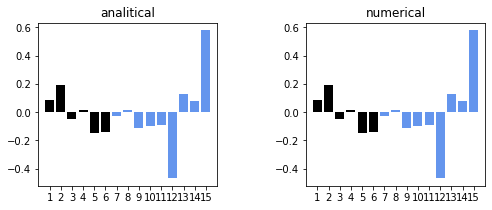

In [12]:
def dCE_FNN(wv, M, K, x, t):
    N, D = x.shape
    # wv을 w와 v로 되돌림
    w = wv[:M * (D + 1)] #bias항까지 추가해서 D+1이다. M은 w의 파라미터이다.
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):]  
    v = v.reshape((K, M + 1)) #여기도 마찬가지 여기서 M은 중간 산출물의 행렬이다.  K는 파라미터 V의 크기이다. (출력의 행렬이가. )   
    # ① x를 입력하여 y를 얻음
    y, a, z, b = FNN(wv, M, K, x)
    # 출력 변수의 준비
    dwv = np.zeros_like(wv) #dwv는 w와 v파라미터의 미분 값이기 때문에 wv와 같은 형태를 가진다. np.zeros_like()은 미리 설정한 array와 같은 형태로 zeros를 생성
    dw = np.zeros((M, D + 1)) #np.zeros_like(w)와 같다. 
    dv = np.zeros((K, M + 1))
    delta1 = np.zeros(M) # 1층 오차
    delta2 = np.zeros(K) # 2층 오차(k = 0 부분은 사용하지 않음)
    for n in range(N): # (A)
        # ② 출력층의 오차를 구하기
        for k in range(K):
            delta2[k] = (y[n, k] - t[n, k])    #y-t부분 구현
        # ③ 중간층의 오차를 구하기
        for j in range(M):
            delta1[j] = z[n, j] * (1 - z[n, j]) * np.dot(v[:, j], delta2) #시그모이드의 미분을 이용해 z(1-z)이용
        # ④ v의 기울기 dv를 구하기
        for k in range(K):
            dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N
        # ④ w의 기울기 dw를 구하기
        for j in range(M):
            dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n, :], 1] / N
    # dw와 dv를 합체시킨 dwv로 만들기
    dwv = np.c_[dw.reshape((1, M * (D + 1))), \
                dv.reshape((1, K * (M + 1)))]
    dwv = dwv.reshape(-1)
    return dwv


#------Show VW
def Show_dWV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3],
            align="center", color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:],
            align="center", color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)
    
    
#-- 동작 확인
M = 2
K = 3
N = 2
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)


dWV_ana = dCE_FNN(WV, M, K, X_train[:N, :], T_train[:N, :])
print("analytical dWV")
print(dWV_ana)


dWV_num = dCE_FNN_num(WV, M, K, X_train[:N, :], T_train[:N, :])
print("numerical dWV")
print(dWV_num)


plt.figure(1, figsize=(8, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
Show_dWV(dWV_ana, M)
plt.title('analitical')
plt.subplot(1, 2, 2)
Show_dWV(dWV_num, M)
plt.title('numerical')
plt.show()

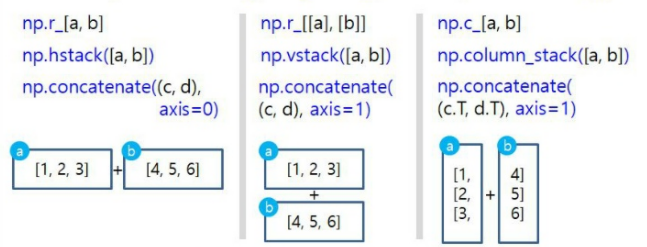

In [13]:
import time


# 해석적 미분을 사용한 구배법 -------
def Fit_FNN(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wv = wv_init.copy()
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n):
        wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train) # (A)
        err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
        wv_hist[i, :] = wv
    return wv, wv_hist, err_train, err_test


# 메인 ---------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000
alpha = 1
WV, WV_hist, Err_train, Err_test = Fit_FNN(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:36.886 sec


수치 미분과 비교해보면 수치미분은 240초가 걸렸지만  
해석적 미분으로는 36초밖에 걸리지 않았다.  

네트워크의 규모가 커지면 커질수록 연산량은 많아지기 때문에  
우리는 해석적인 미분을 이용하여 최적화를 해야한다.

(3600, 2)


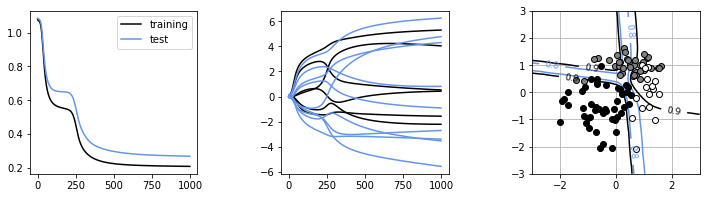

In [26]:
plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)
# 학습 오차의 표시 ---------------------------
plt.subplot(1, 3, 1)
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()
# 가중치의 시간 변화 표시 ---------------------------
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
# 경계선 표시 --------------------------
plt.subplot(1, 3, 3)
show_data(X_test, T_test)
M = 2
K = 3
show_FNN(WV, M, K)
plt.show()

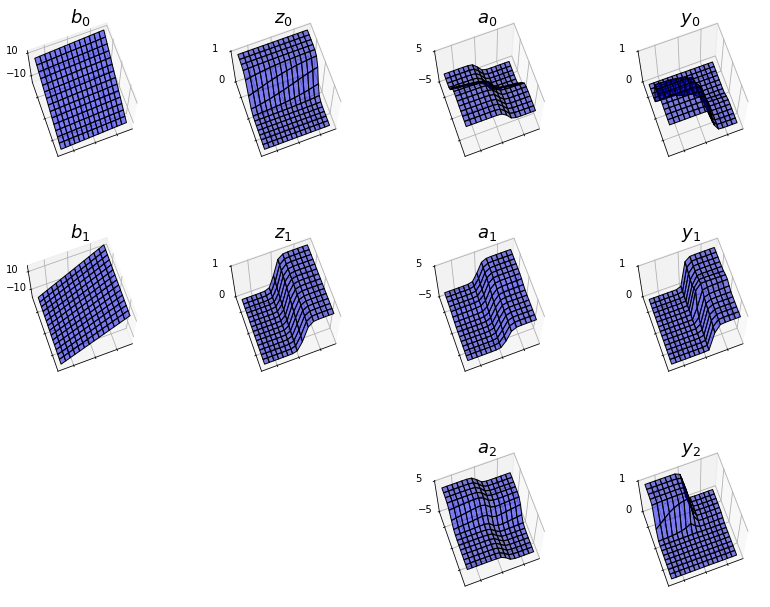

In [15]:
from mpl_toolkits.mplot3d import Axes3D


def show_activation3d(ax, v, v_ticks, title_str):
    f = v.copy()
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, color='blue', edgecolor='black',
                    rstride=1, cstride=1, alpha=0.5)
    ax.view_init(70, -110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize=18)
    
    
M = 2
K = 3
xn = 15 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))]
y, a, z, b = FNN(WV, M, K, x)


fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)

for m in range(M):
    ax = fig.add_subplot(3, 4, 1 + m * 4, projection='3d')
    show_activation3d(ax, b[:, m], [-10, 10], '$b_{0:d}$'.format(m))
    ax = fig.add_subplot(3, 4, 2 + m * 4, projection='3d')
    show_activation3d(ax, z[:, m], [0, 1], '$z_{0:d}$'.format(m))
    
    
for k in range(K):
    ax = fig.add_subplot(3, 4, 3 + k * 4, projection='3d')
    show_activation3d(ax, a[:, k], [-5, 5], '$a_{0:d}$'.format(k))
    ax = fig.add_subplot(3, 4, 4 + k * 4, projection='3d')
    show_activation3d(ax, y[:, k], [0, 1], '$y_{0:d}$'.format(k))


plt.show()

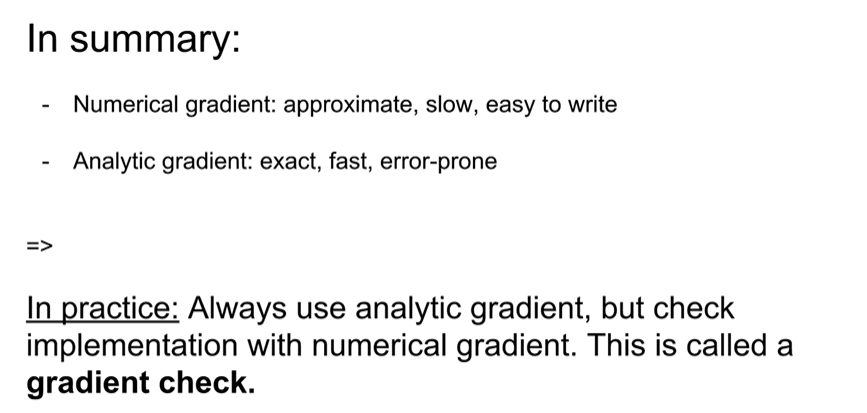

Numerical VS Analytic   
- Numerical은 오래 걸린다.   
- Numerical은 접근 방식이 간단하다. 
- Analytic은 빠르지만 실수를 유발할 수 있다.

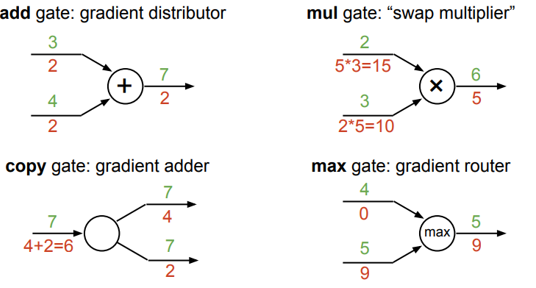

- 덧셈의 연산의 오차역전파는 copy처럼 upstream gradient가 그대로 전해진다. 
- copy의 경우 덧셈과 반대로인데 upstream gradient를 합치면 된다.
- mul의 경우 x와 y가 곱한 경우 x에는 y값이, y에는 x값이 곱해진다.
- max gate인 경우 던 큰 값에 upstream gradient가 전해진다. 작은 값은 gradient가 0이다.

# tensorflow의 층으로 분류를 해보기

In [21]:
np.random.seed(1)


# --- Sequential로 모델작성
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid',
                kernel_initializer='uniform')) # (A) 선형 연산을 한다, 시그모이드 사용
model.add(Dense(3,activation='softmax',
                kernel_initializer='uniform')) # (B) 선형연산을 한다. softmax를 사용 

#최적화알고리즘 결정
sgd = tf.keras.optimizers.SGD(lr=1, momentum=0.0,
                           decay=0.0, nesterov=False) # (C)lr이란 learning_rate를 뜻한다.

#오차함수, 정확도 지표 설정
model.compile(optimizer=sgd, loss='categorical_crossentropy', #이진분류가 아닌 다중분류 크로스 엔트로피 사용 
              metrics=['accuracy']) # (D)


# ---------- 학습 model.fit안에 epoch,  배치크기 설정, 검증데이터도 넣을 수 있다. 파이썬과 다르게 history에 정확도 오차가 저장되어있다. 
startTime = time.time()
history = model.fit(X_train, T_train, epochs=1000, batch_size=100,
                    verbose=0, validation_data=(X_test, T_test)) 


# ---------- 모델 평가 model.evaluate로 평가한다. 
score = model.evaluate(X_test, T_test, verbose=0) # (F)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'\
      .format(score[0], score[1]))
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


cross entropy 0.30, accuracy 0.88
Calculation time:41.749 sec


Dense(2, input_dim=2, activation='sigmoid',
                kernel_initializer='uniform'))
- 2차원 정보를 2개의 가중치와 선형 연산을 한다. 
- activation = 'sigmoid'로 시그모이드로 비선형 함수를 설정한다. 
- kernel_initializer='uniform' 
  가중치는 -0.05 ~ 0.05로 균등하게 작은 임의의 값으로 초기화

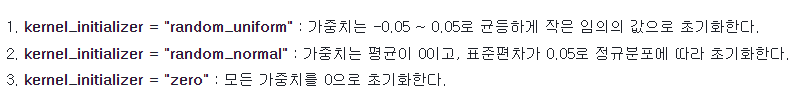

여러가지 가중치 초기화이다.

gd = tf.keras.optimizers.SGD(lr=1, momentum=0.0,
                           decay=0.0, nesterov=False)   
                       
- lr: learning_rate를 의미한다. 
- momentum: 가속도를 의미한다. local minimum과 saddle point를 벗어날 수 있다. 
- decay l2 규제를 의미한다. 
- nesterov 네스테로프를 의미한다. 현재시점에서 속도시점을 더한뒤 더한 그 지점에서가리키는 gradient 방향 대로 가중치를 업데이트하는 알고리즘이다.
                           

model.Sequential()로 층을 묶는다.   
model.Dense()    

- 2차원의 데이터가 들어가 2*2 선형 연산을 수행한다.  
- activation = sigmoid로 시그모이드를 비선형 함수로 사용한다.   
- 그다음에는 2*3연산을 한다. 소프트 맥스를 사용



비선형 함수가 왜 필요할까? 비선형 함수로 감싸면 비선형성으로 새롭게 매핑이 된다.   
선형연산을 비선형 함수없이 여러번 한다면 선형연산을 한 번 한것과 같다.   

비선형함수가 나온 배경:   
Neural Network가 처음에 나왔을 때 사람의 뉴런을 모방하였다. 
이것이 퍼셉트론이다.   
인간의 뇌는 어떤 수치에 따라 정보를 증폭하기도 하고, 정보를 활성화 하지 않는다. 
이는 시냅스의 세기에 따라 뉴런이 판단하는데 
시냅스의 세기를 따라한 것이 활성함수이다.

model.compile(optimizer=sgd, loss='categorical_crossentropy', #이진분류가 아닌 다중분류 크로스 엔트로피 사용 
              metrics=['accuracy'])

- optimizer: 아까 정의한 SGD사용
- loss =  categorical cross entropy 다중 분류의 엔트로피 사용 
- metrics: 평가지표이다.

history = model.fit(X_train, T_train, epochs=1000, batch_size=100,
                    verbose=0, validation_data=(X_test, T_test)) 
모델이 훈련을 하는 과정이다. 
- X_train, T_train으로 데이터와 훈련 값을 정의한다. 
- epoch로 훈련 횟수를 지정한다. 
- batch_size 배치사이즈를 정의한다. 
- verbose: 훈련과정을 보여준다. 
- validation을 넣음으로 써 훈련 중간에 검증을 할 수 있다.

model.eval()은 학습한 모델이 testdata를 이용하여 시험을 보는 과정이다.

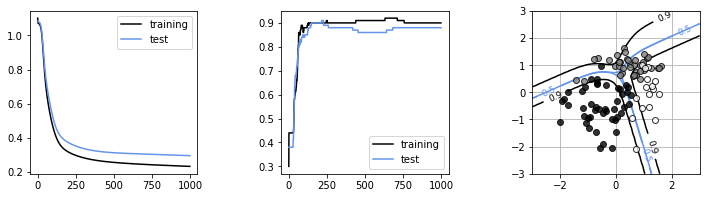

In [23]:
plt.figure(1, figsize = (12, 3))
plt.subplots_adjust(wspace=0.5)


# 학습 곡선 표시 --------------------------
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label='training') # (A)
plt.plot(history.history['val_loss'], 'cornflowerblue', label='test') # (B)
plt.legend()


# 정확도 표시 --------------------------
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'black', label='training') # (C)
plt.plot(history.history['val_accuracy'], 'cornflowerblue', label='test') # (D)
plt.legend()





# 경계선 표시 --------------------------
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
xn = 60 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))]
y = model.predict(x) # (E)모델이 test data를 예측하는 모습이다. 
K = 3
for ic in range(K):
    f = y[:, ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9], colors=[
        'cornflowerblue', 'black'])
    cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
plt.show()

history = model.fit(X_train, T_train, epochs=1000, batch_size=100,
                    verbose=0, validation_data=(X_test, T_test))    
                   
이 코드를 통해 hitory에는 다양한 변수가 저장되어 있는 것을 알 수 있다. 
history.history를 입력해보면 정확도의 증가 추이, 오차의 감소 추이등을 알 수 있다.

tensorflow의 모델을 통하여 효과적으로 분류를 하였다.